In [1]:
!pip install kaggle --upgrade

In [4]:
import os
from getpass import getpass
from google.colab import userdata
os.environ["KAGGLE_USERNAME"]=" " # inster username here
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY') # Enter key with no " "

In [5]:
!kaggle competitions download -c playground-series-s3e24

100% 6.81M/6.81M [00:00<00:00, 70.1MB/s]
100% 6.81M/6.81M [00:00<00:00, 69.7MB/s]


In [6]:
!unzip -q "./playground-series-s3e24.zip" -d .

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df=pd.read_csv('train.csv')

# Preprocessing

In [ ]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [ ]:
df['Urine protein'].value_counts()

1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: Urine protein, dtype: int64

In [ ]:
# Categoricaal
cat = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']
num = df.columns[~df.columns.isin(cat+['id','smoking'])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

# Feature Engineering

In [10]:
df=pd.read_csv('train.csv')

In [11]:
# Cholesterol Ratio : Total Cholesterol / HDL - ration of total cholesterol to good cholesterol
# AST/ALT ratio or De Ritis ratio - liver function test

In [12]:
# Cholesterol Ratio (Higher -> Bad)
df['cholesterol_ratio'] = round(df['Cholesterol']/df['HDL'], 2)

In [13]:
#AST/ALT ratio or De Ritis ratio (Higher => Bad)
df['de_ritis_ratio'] = round(df['AST']/df['ALT'], 2)

In [14]:
# BMI
def bmi(height,weight):
  bmi=weight/(height/100)**2

  return round(bmi,2)

df['bmi']=bmi(df['height(cm)'], df['weight(kg)'])
df['bmi_class']=pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf], labels=["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"])

In [15]:
categorical = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries','bmi_class']
numerical = df.columns[~df.columns.isin(categorical+['id','smoking', 'weight(kg)','height(cm)','bmi'])]

In [ ]:
df.tail()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,cholesterol_ratio,de_ritis_ratio,bmi,bmi_class
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0,3.31,0.96,18.73,Normal
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0,3.33,1.05,31.22,Obese 1
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0,2.17,1.67,19.53,Normal
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1,3.00,1.29,27.55,Overweight
159255,159255,40,145,45,76.4,1.0,1.2,1,1,125,87,83,186,87,87,81,14.0,1,0.8,21,16,17,0,0,2.14,1.31,21.40,Normal


# Exploratory Data Analysis (EDA)
- ranges of values, missing values, analysis of target variable, feature importance analysis

## Range of values

In [ ]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


## Distribution of Numerical Data

In [ ]:
from scipy import stats

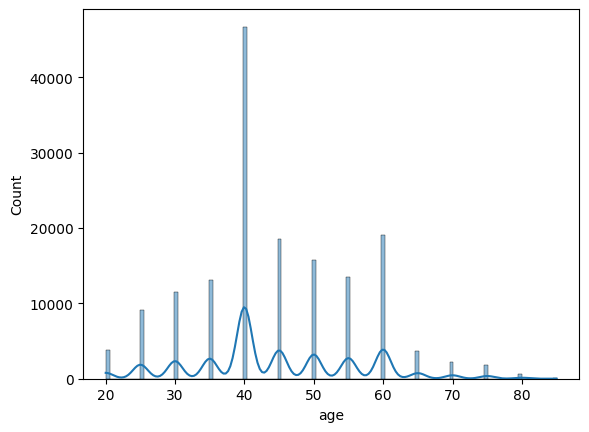

0.2916945987004917


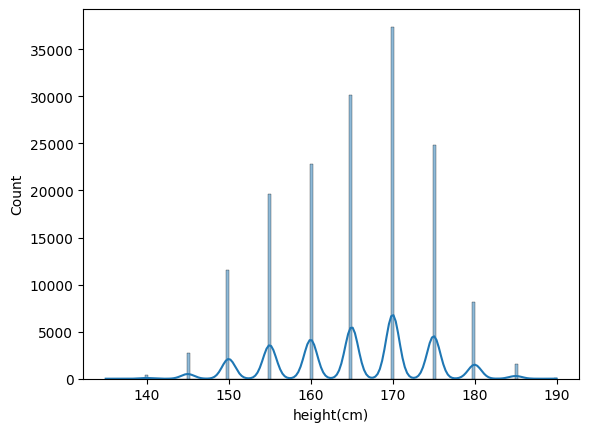

-0.2699122629005676


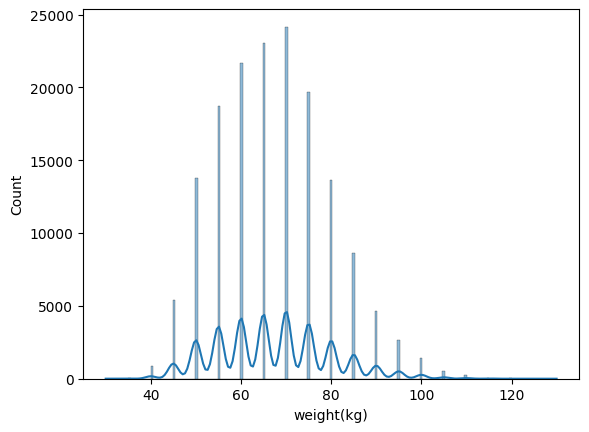

0.37807118941219314


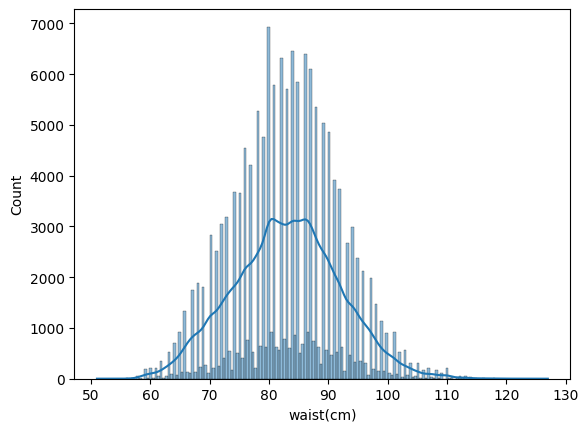

0.072445211435159


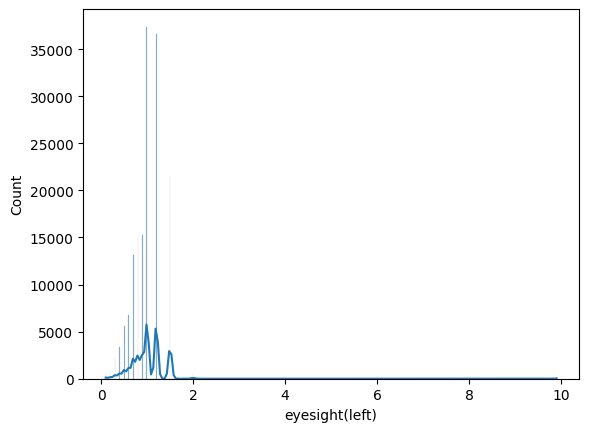

8.890488691981494


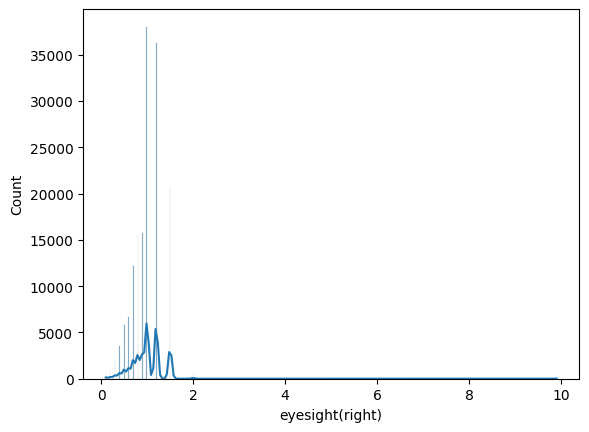

8.486769159433479


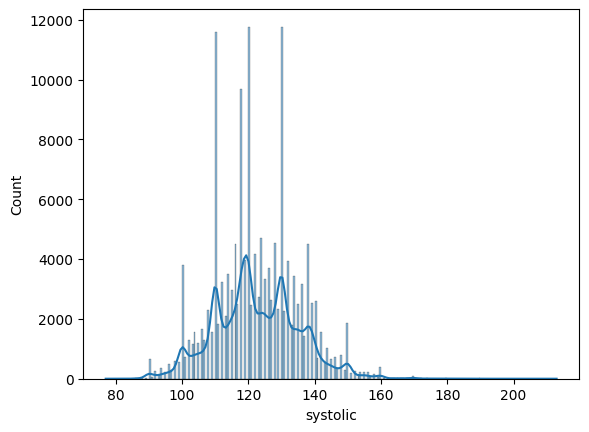

0.2199227406101442


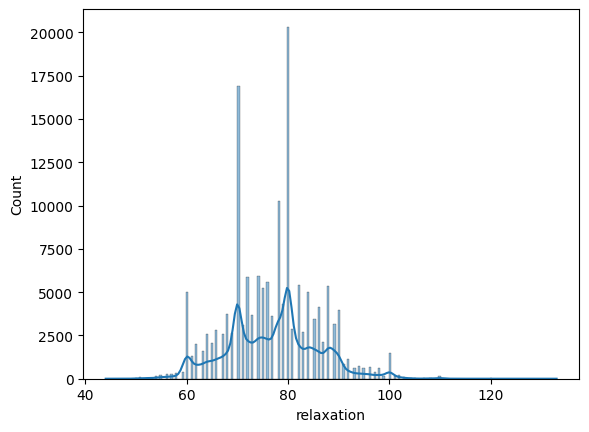

0.17634811380226953


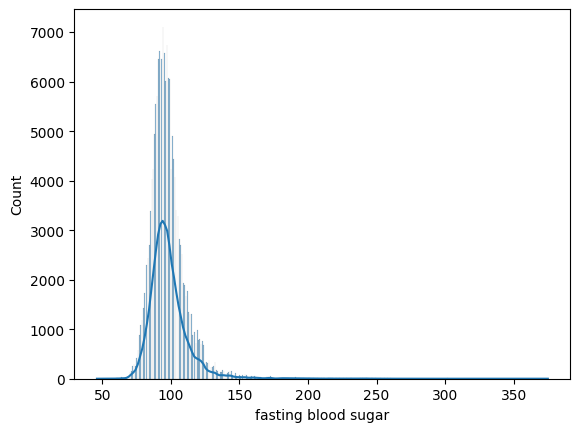

3.461066439999493


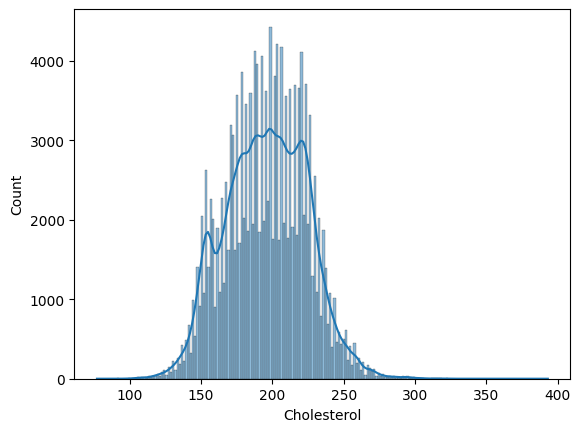

0.04348737897458033


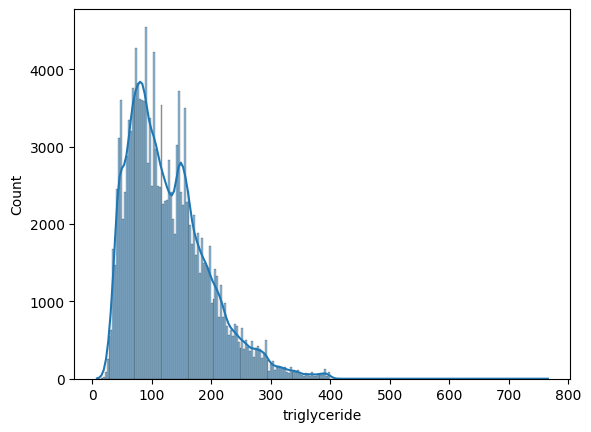

0.9862184603538223


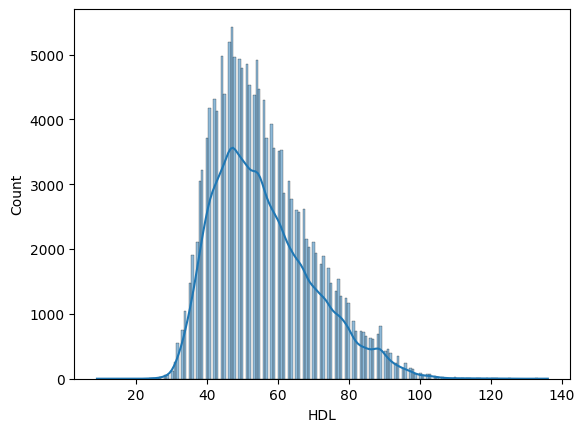

0.7588769304183878


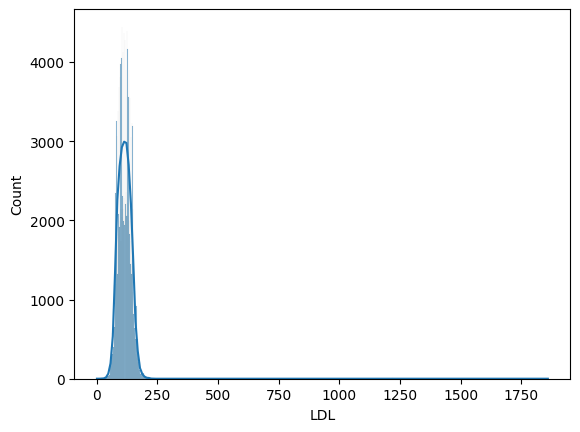

6.874745460406473


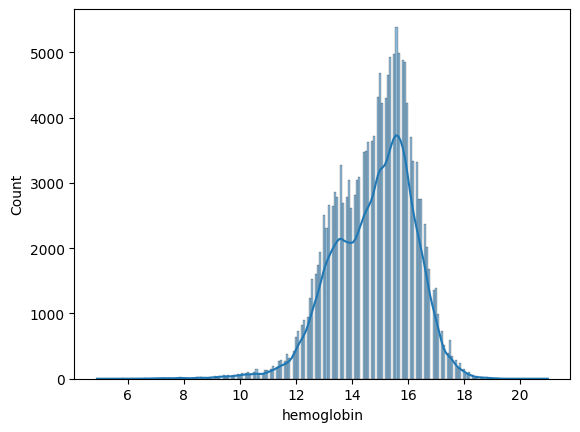

-0.6335645958786732


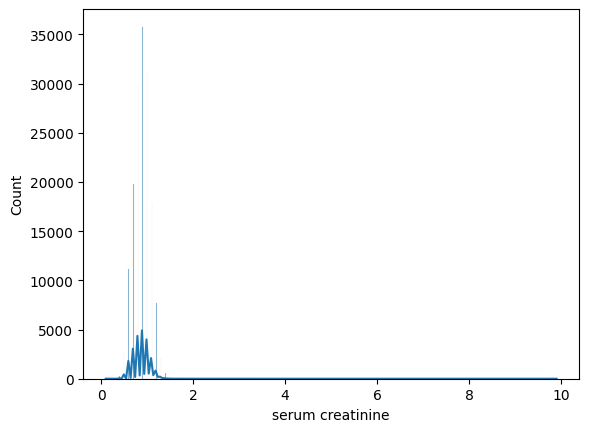

1.511044837935813


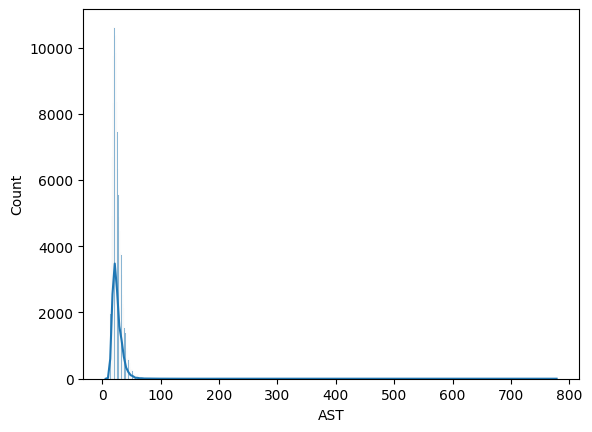

11.592236505990055


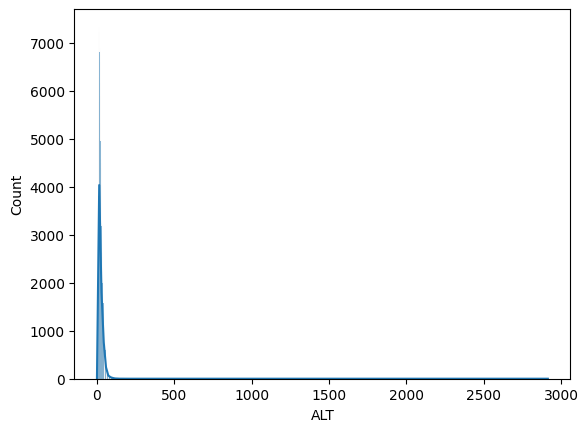

34.82968387441549


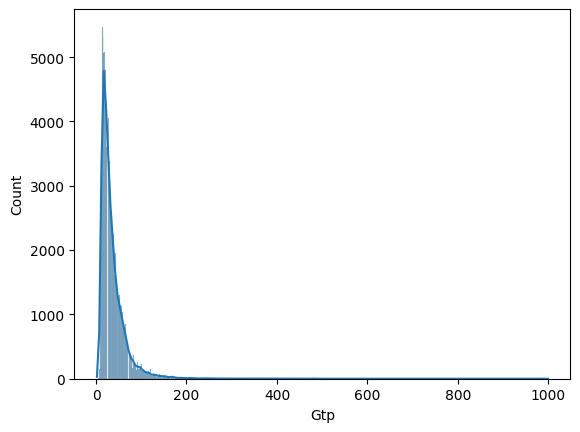

5.414776254674851


In [ ]:
for n in num:
  sns.histplot(data=df,
              x=df[n],
              kde=True
              )
  plt.show()
  print(stats.skew(df[n]))

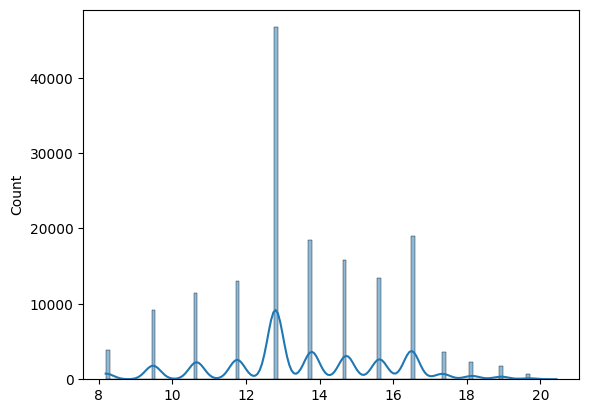

-0.01223200340657581


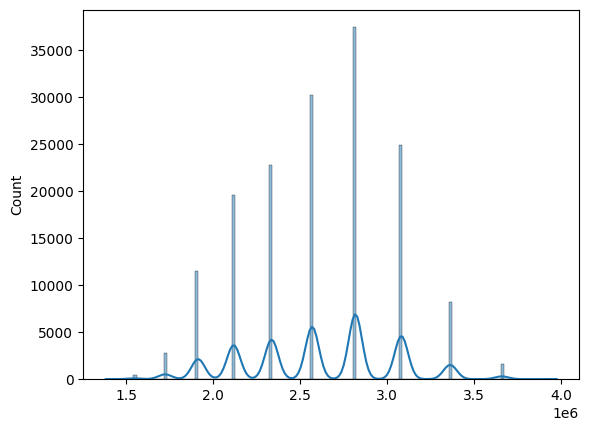

-0.034426235673802055


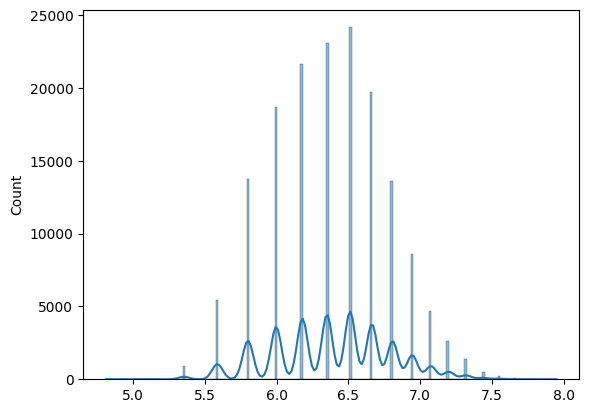

-0.0042635367970881785


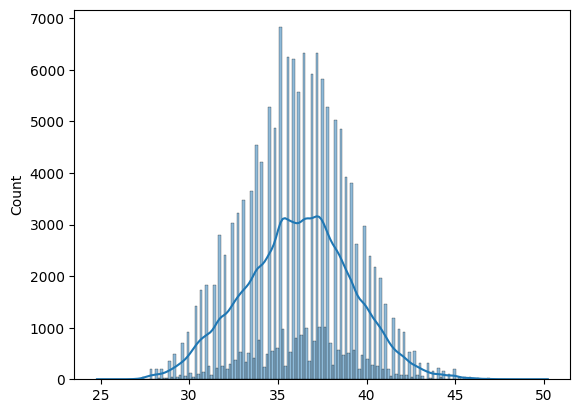

-0.003005099539591231


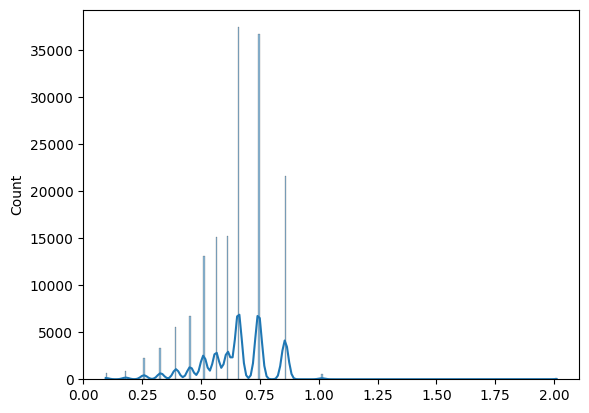

0.4664189874498035


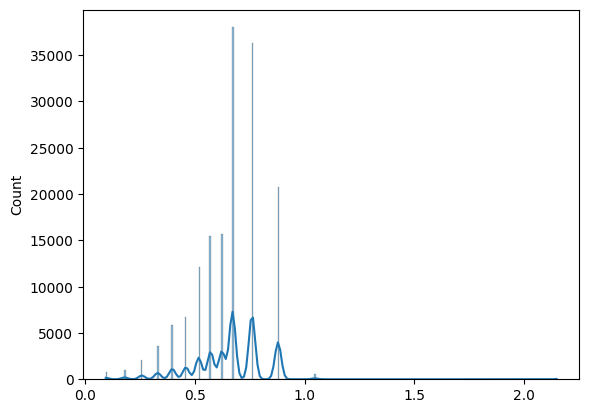

0.5100809029898549


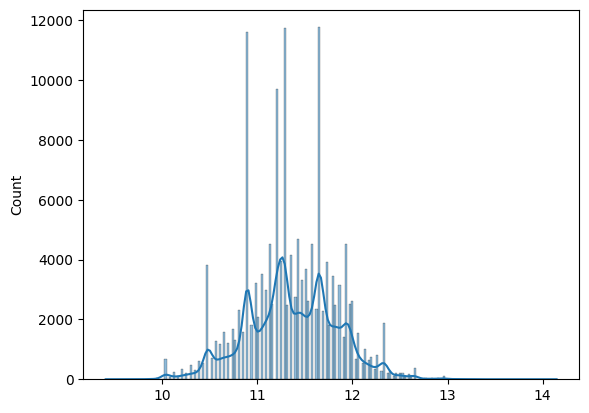

0.0004989620985438026


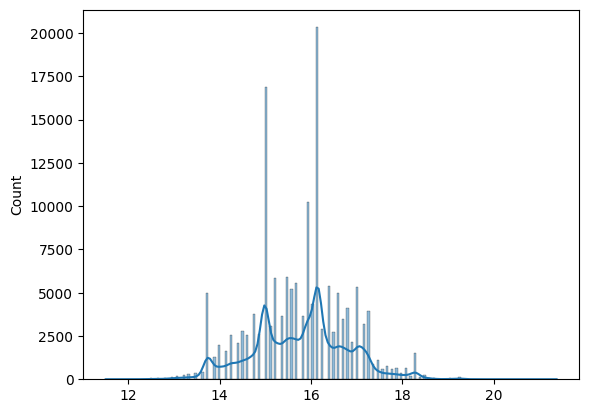

0.00014611624764481073


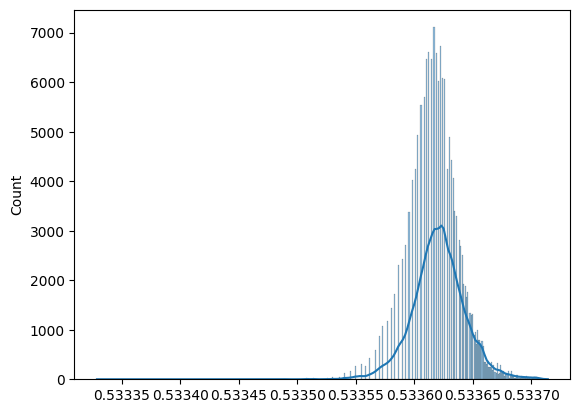

-0.1289448578615814


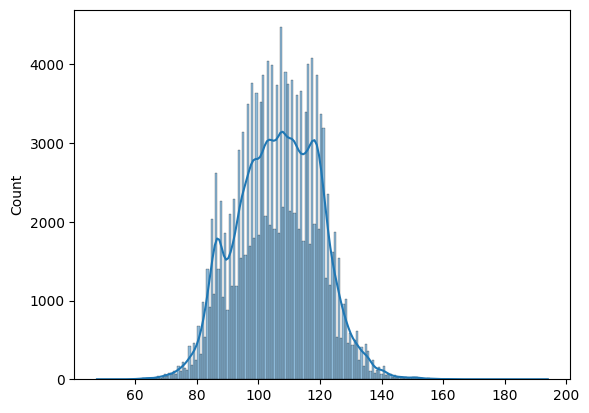

-0.011647718908805057


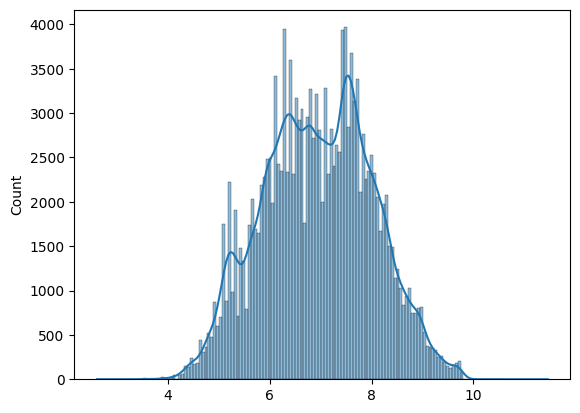

-0.015259997373820744


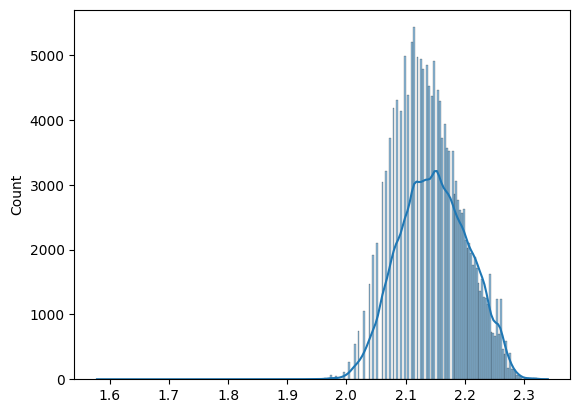

0.011995063350048277


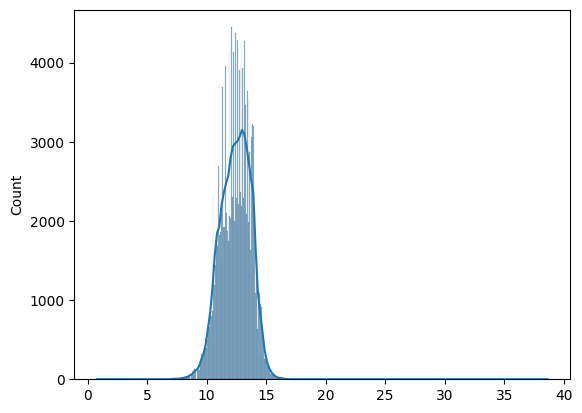

0.11887625550566244


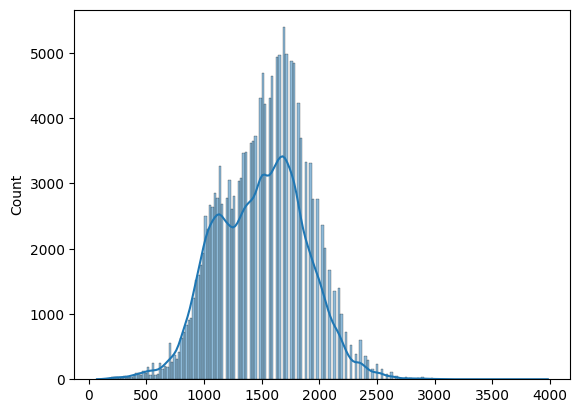

-0.018117498844355942


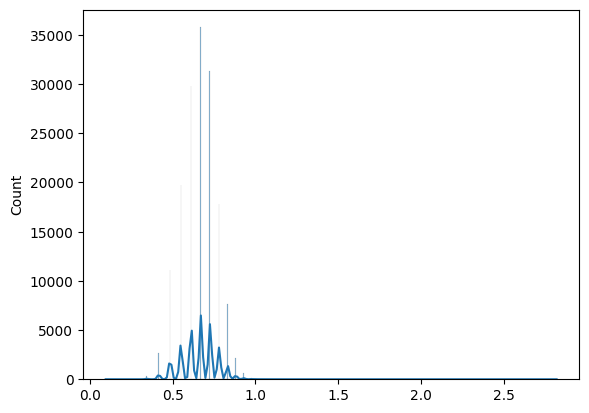

0.11109923789555466


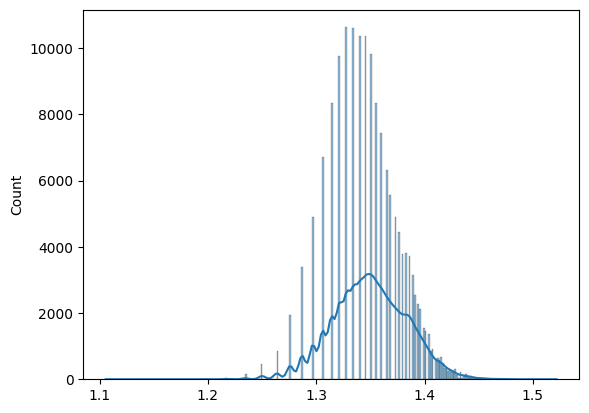

-0.010337727873427729


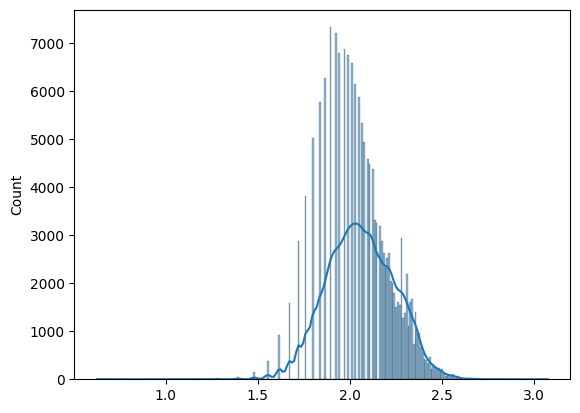

0.0015996966673746283


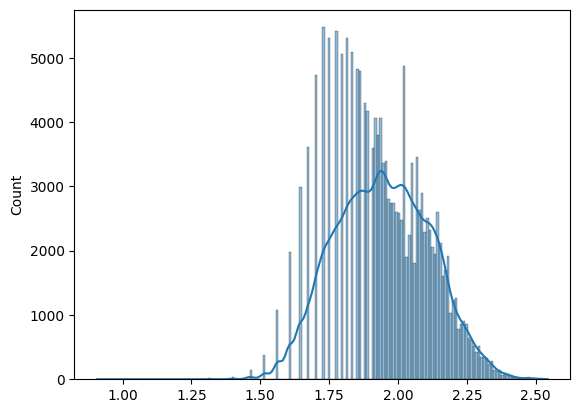

0.02758265582931793


In [ ]:
for n in num:
  sns.histplot(data=df,
              x = stats.boxcox(df[n]+1)[0],
              kde=True
              )
  plt.show()
  print(stats.skew(stats.boxcox(df[n])[0]))

## Missing Values and Duplicate Rows

__Duplicates__

In [ ]:
df[df.duplicated()]

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking


__Missing Values__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [ ]:
df.isna().any()

id                     False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
dtype: bool

## Analysis of Target Variable
- Distribution is fairly balance

In [ ]:
df['smoking'].value_counts(normalize=True)

0    0.562635
1    0.437365
Name: smoking, dtype: float64

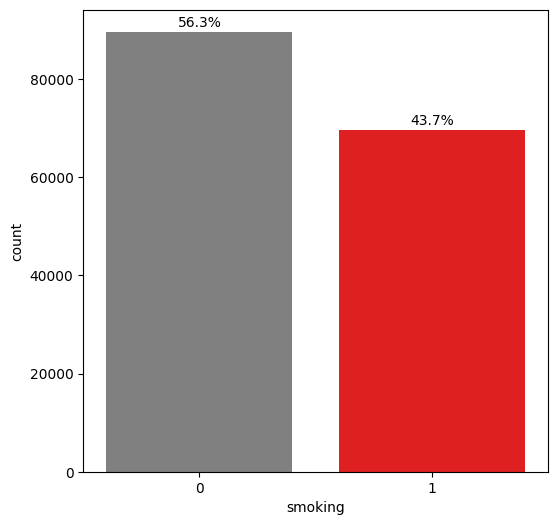

In [ ]:
palette=['gray', 'r']
plt.figure(figsize=(6,6))
ax=sns.countplot(df, x='smoking', palette=palette)
total = float(len(df))
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1000 # added 1000 for spacing
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

In [ ]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,cholesterol_ratio,de_ritis_ratio
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1,4.300000,0.880000
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0,3.403509,1.173913
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1,3.955556,0.870968
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0,4.736842,0.740741
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1,3.522727,1.461538


### Distribution of smokers among ages
- Highest number of smokers found within 20-30, 30-40, 40-50 age brackets


<Axes: xlabel='age_bracket', ylabel='count'>

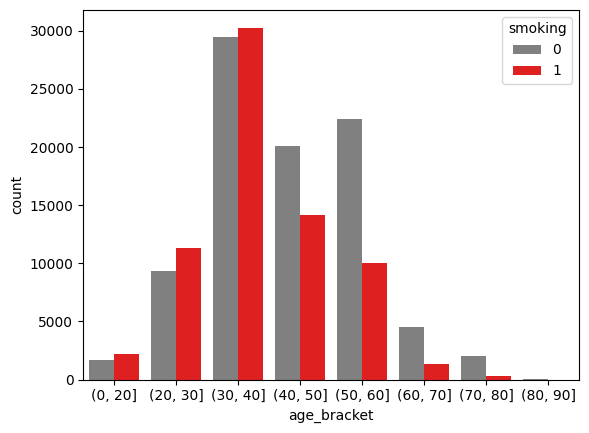

In [ ]:
# Distribution of smokers among ages
df_age=df.copy()
df_age['age_bracket'] = pd.cut(df_age['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90])
sns.countplot(df_age, x='age_bracket', hue='smoking', palette=['gray','r'])

<Axes: xlabel='age', ylabel='count'>

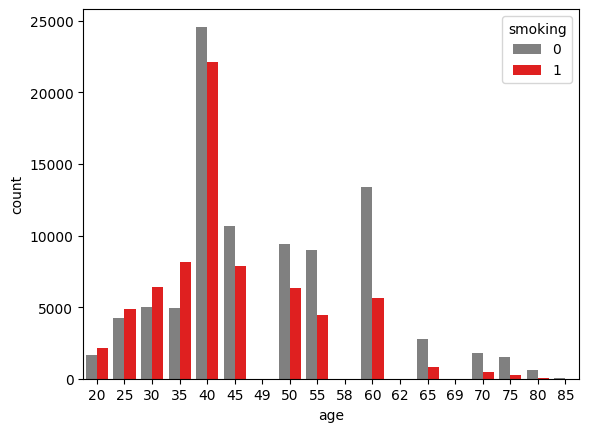

In [ ]:
sns.countplot(df, x='age', hue='smoking', palette=['gray','r'])

### Distribution of smokers among weights
- There are smokers in higher weight brackets

<Axes: xlabel='weight_bracket', ylabel='count'>

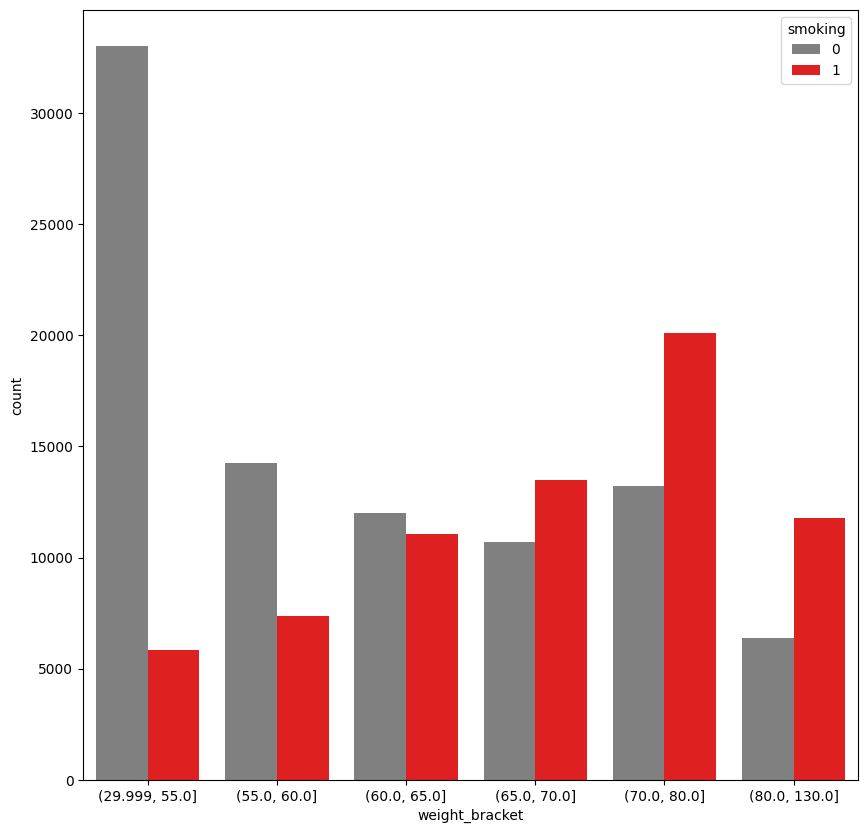

In [ ]:
# Distribution of smokers among weights
df_weight=df.copy()
df_weight['weight_bracket'] = pd.qcut(df_weight['weight(kg)'], q=6)
plt.figure(figsize=(10,10))
sns.countplot(df_weight, x='weight_bracket', hue='smoking', palette=['gray','r'])

<Axes: xlabel='weight(kg)', ylabel='count'>

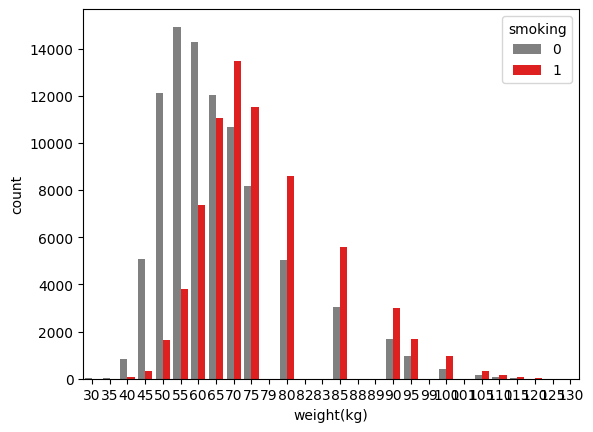

In [ ]:
# Distribution of smokers among weights
sns.countplot(df, x='weight(kg)', hue='smoking', palette=['gray','r'])

### Distribution of smokers among cholesterol ratio ranges
- The number of smokers in each cholestarol ratio bracket increases as the ratio increases

<Axes: xlabel='cholesterol_bracket', ylabel='count'>

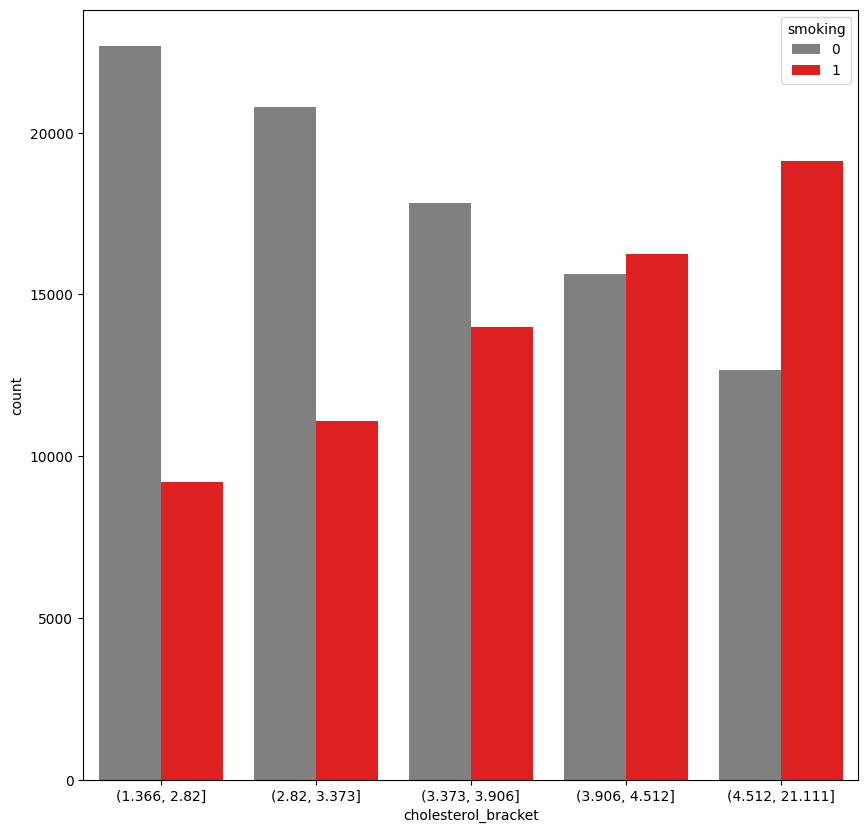

In [ ]:
# Distribution of smokers among cholesterol ranges
df_cholesterol=df.copy()
df_cholesterol['cholesterol_bracket'] = pd.qcut(df_cholesterol['cholesterol_ratio'], q=5)
plt.figure(figsize=(10,10))
sns.countplot(df_cholesterol, x='cholesterol_bracket', hue='smoking', palette=['gray','r'])

### Distribution of smokers among de_ritis ratio ranges
- There are more smokers in a de ritis ratio range for lower values

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(0.009600000000000001, 0.68]'),
  Text(1, 0, '(0.68, 0.818]'),
  Text(2, 0, '(0.818, 0.944]'),
  Text(3, 0, '(0.944, 1.062]'),
  Text(4, 0, '(1.062, 1.19]'),
  Text(5, 0, '(1.19, 1.333]'),
  Text(6, 0, '(1.333, 1.545]'),
  Text(7, 0, '(1.545, 43.0]')])

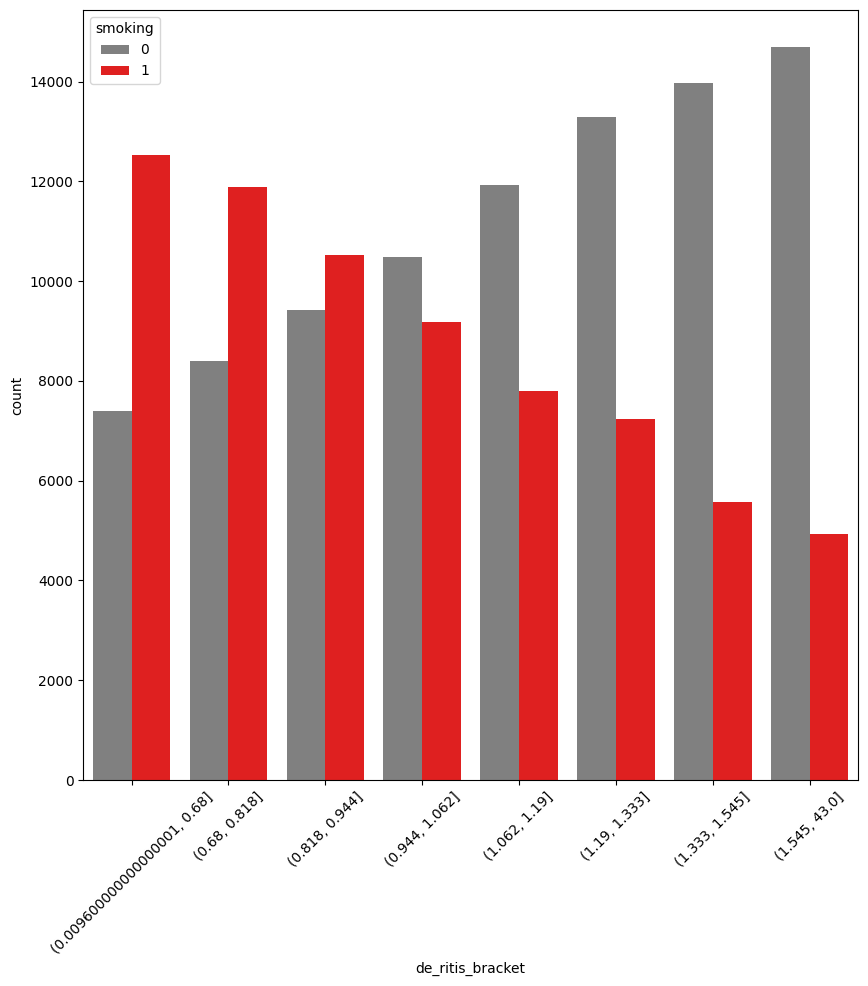

In [ ]:
# Distribution of smokers among de_ritis ratio ranges
df_de_ritis=df.copy()
df_de_ritis['de_ritis_bracket'] = pd.qcut(df_de_ritis['de_ritis_ratio'], q=8)
plt.figure(figsize=(10, 10))
sns.countplot(df_de_ritis, x='de_ritis_bracket', hue='smoking', palette=['gray','r'])
plt.xticks(rotation=45)

### Distribution of smokers based on BMI Class
- Most of the population are normal or overweight.
- People who are smokers are higher in number compared to non-smokers in the Obese Class

<Axes: xlabel='bmi_class', ylabel='count'>

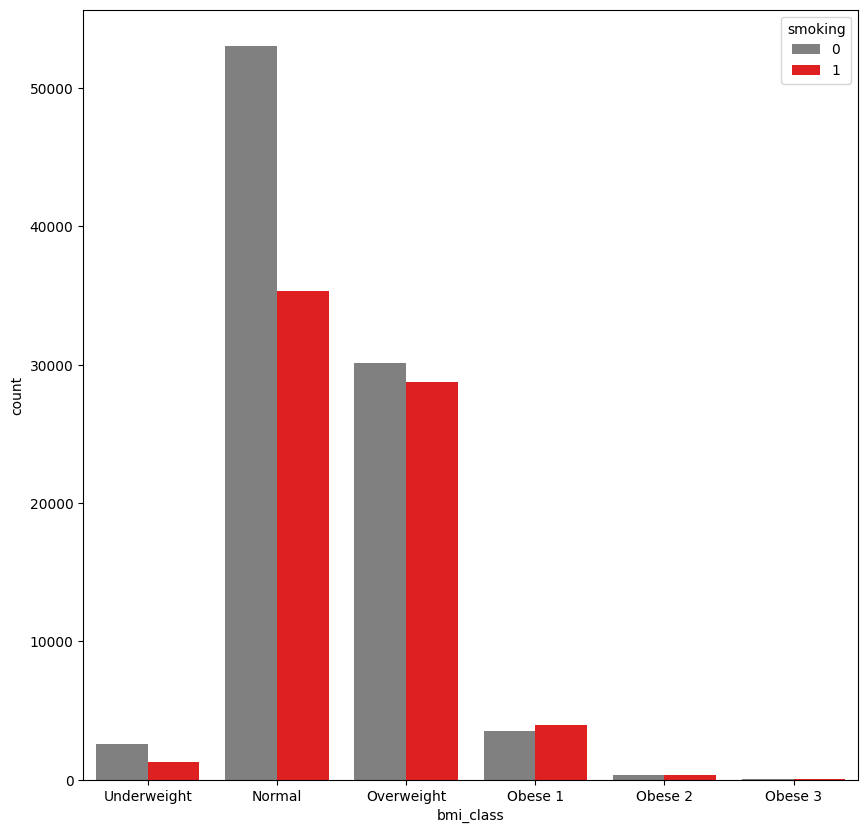

In [17]:
# Distribution of smokers (bmi class)
df_bmi=df.copy()
plt.figure(figsize=(10, 10))
sns.countplot(df_bmi, x='bmi_class', hue='smoking', palette=['gray','r'])
# plt.xticks(rotation=45)

### Distribution of smokers based on dental caries
- For the population of patients with dental caries, smokers are slightly higher in number

<Axes: xlabel='dental caries', ylabel='count'>

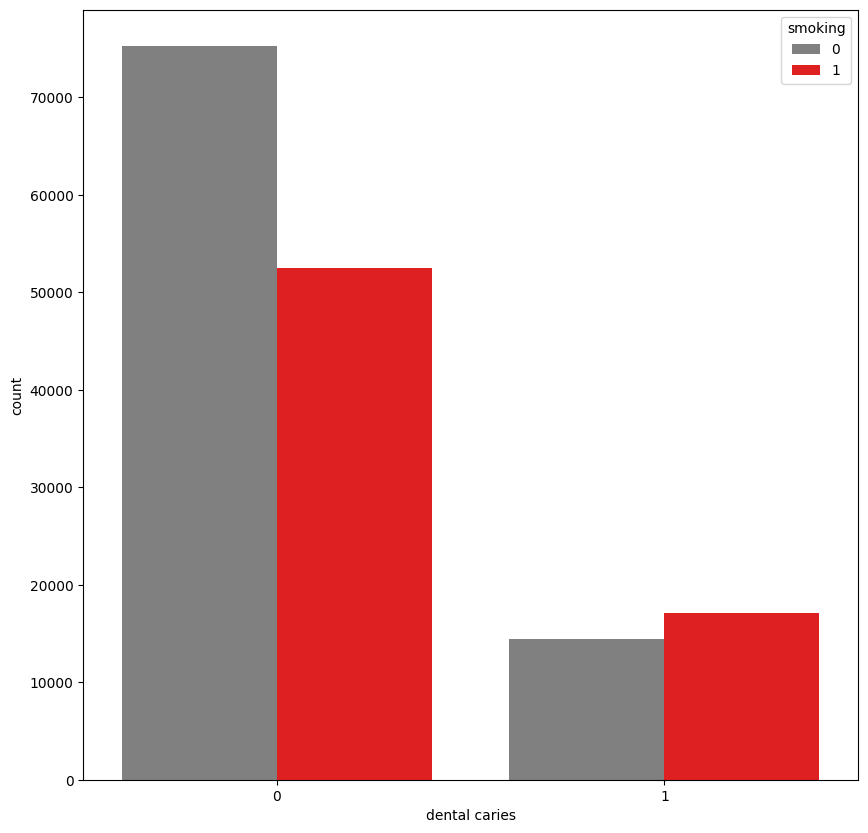

In [ ]:
# Distribution of smokers (dental caries)
df_dental=df.copy()
# df_dental['dental_bracket'] = pd.qcut(df_dental['dental caries'], q=2)
plt.figure(figsize=(10, 10))
sns.countplot(df_dental, x='dental caries', hue='smoking', palette=['gray','r'])
# plt.xticks(rotation=45)

## Feature Importancce

### Difference from global mean & risk ratio

In [19]:
global_smoking=df.smoking.mean()
for c in categorical:
    print(c)
    df_group = df.groupby(c).smoking.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_smoking
    df_group['risk'] = df_group['mean'] / global_smoking
    display(df_group)
    print()
    print()

hearing(left)


,mean,count,diff,risk
hearing(left),,,,
1,0.440336,155438,0.002971,1.006794
2,0.316396,3818,-0.120969,0.723414




hearing(right)


,mean,count,diff,risk
hearing(right),,,,
1,0.440196,155526,0.002831,1.006474
2,0.319303,3730,-0.118062,0.730061




Urine protein


,mean,count,diff,risk
Urine protein,,,,
1,0.441138,150862,0.003773,1.008627
2,0.367267,5609,-0.070098,0.839726
3,0.370736,2228,-0.066629,0.847658
4,0.398323,477,-0.039042,0.910733
5,0.351351,74,-0.086014,0.803337
6,0.000000,6,-0.437365,0.000000




dental caries


,mean,count,diff,risk
dental caries,,,,
0,0.411082,127724,-0.026283,0.939905
1,0.543828,31532,0.106463,1.243420




bmi_class


,mean,count,diff,risk
bmi_class,,,,
Underweight,0.327746,3878,-0.109619,0.749366
Normal,0.400038,88389,-0.037327,0.914656
Overweight,0.488482,58862,0.051117,1.116874
Obese 1,0.527016,7440,0.089651,1.204980
Obese 2,0.510511,666,0.073146,1.167241
Obese 3,0.428571,21,-0.008794,0.979894


### Mutual Information
- Dental Caries and BMI class provide the most information about the target variable (smoking)

In [20]:
from sklearn.metrics import mutual_info_score

In [21]:
def mutual_info_smoking_score(series):
    return mutual_info_score(series, df.smoking)

In [22]:
mi = df[categorical].apply(mutual_info_smoking_score)
mi.sort_values(ascending=False)

dental caries     0.005644
bmi_class         0.004944
hearing(left)     0.000753
hearing(right)    0.000700
Urine protein     0.000551
dtype: float64

## Correlation
Highly correlated feature

Note : HDL+LDL+0.2*Triglyceride = Total cholesterol
1. LDL - Cholesterol
2. Systolic - Relaxation
3. ALT - AST
4. HDL - Triglyceride

In [ ]:
corr_matrix=df.corr()

<Axes: >

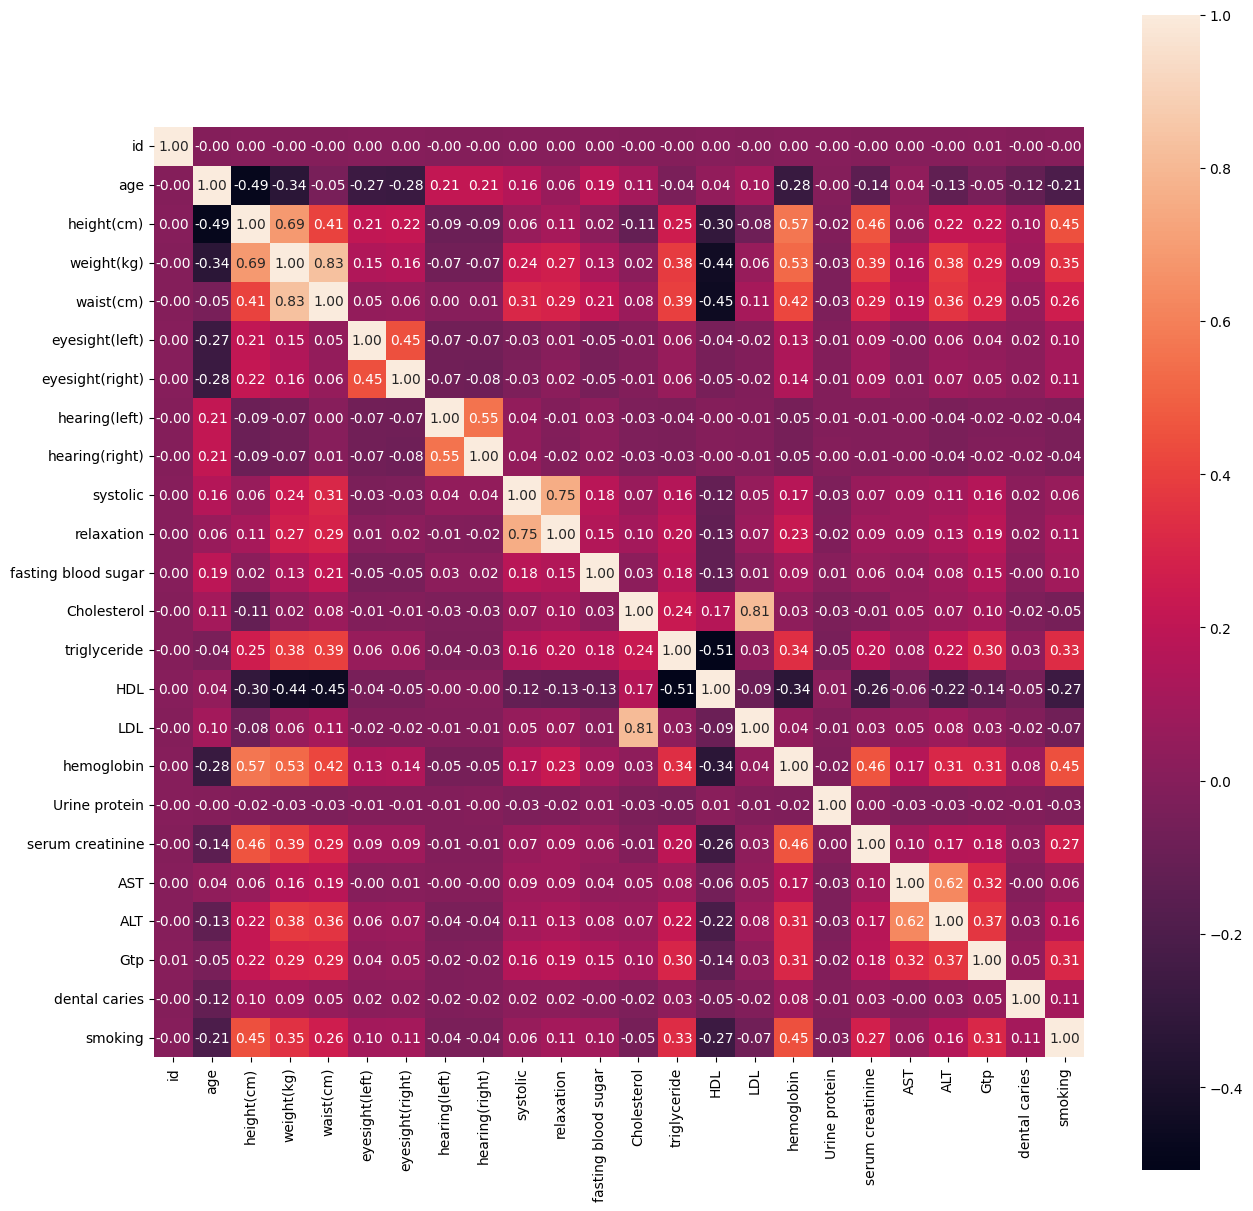

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', square=True)

In [ ]:
melt_cm=pd.melt(corr_matrix.reset_index(), id_vars='index').sort_values(by='value', ascending=False)

In [ ]:
melt_cm['value_abs']=melt_cm['value'].abs()

In [ ]:
melt_cm[(melt_cm['value_abs'] > 0.5) & (melt_cm['value_abs'] < 0.9)]

,index,variable,value,value_abs
76,waist(cm),weight(kg),0.830208,0.830208
99,weight(kg),waist(cm),0.830208,0.830208
303,LDL,Cholesterol,0.808533,0.808533
372,Cholesterol,LDL,0.808533,0.808533
226,relaxation,systolic,0.753003,0.753003
249,systolic,relaxation,0.753003,0.753003
74,height(cm),weight(kg),0.686645,0.686645
51,weight(kg),height(cm),0.686645,0.686645
476,ALT,AST,0.623408,0.623408
499,AST,ALT,0.623408,0.623408


# Model Training

In [ ]:
!pip install hyperopt --quiet
!pip install mlflow --quiet
!pip install shap --quiet
# !pip install lightgbm
!pip install lime --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# general libraries
import time
import numpy as np
import pandas as pd

# visualization
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# modelling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder, StandardScaler

# ensemble
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# hypertuning
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

#Metrics
from sklearn.metrics import f1_score, log_loss, roc_auc_score, precision_score, recall_score, matthews_corrcoef
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score, cross_validate

# interpretability
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

## Preprocessing

In [ ]:

###############################################################################
# Set the columns to respective variables
X=df.loc[:, df.columns != 'smoking']
y=df['smoking']
categorical = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries','bmi_class']
numerical = df.columns[~df.columns.isin(categorical+['id','smoking', 'weight(kg)','height(cm)','bmi'])]
###############################################################################
# Pipeline for transformation

# Function for log
def np_log_1(df,numerical):
  for col in numerical:
    df[col]=np.log(df[col]+1)

# Function for yeojohnson
from scipy import stats
def stats_boxcox(df,numerical):
  for col in numerical:
    df[col]=stats.boxcox(df[col])[0]

# Pipelines for numerical and categorical
num_pipeline = make_pipeline(
    FunctionTransformer(func=stats_boxcox(numerical=numerical, df=X), feature_names_out="one-to-one"), #np_log_1(numerical=numerical, df=X)
    StandardScaler())

cat_pipeline = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown="ignore"), verbose=True)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical),
    ("cat", cat_pipeline, categorical),
   ])

preprocessing_pipeline = make_pipeline(preprocessing)
###############################################################################
# Train-Test Function for Unprocessed data

def train_val_test(df, val_size=0.2, test_size=0.1):

  # Choosing Initial Features
  val_pct = val_size/(1-test_size)

  X=df.loc[:, df.columns != 'smoking']
  y=df['smoking']

  # 70-20-10
  X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y) # 90-10
  X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=val_pct, random_state=42, stratify=y_full_train) # 20 is __% of 90

  dict_df = {'X_full_train':X_full_train,'X_train': X_train, 'X_val': X_val, 'X_test': X_test, 'y_full_train':y_full_train, 'y_train': y_train, 'y_val':y_val, 'y_test':y_test}

  return dict_df
###############################################################################


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Creating the train - val - test for unprocessed data
dict_df=train_val_test(df)

X_full_train=dict_df['X_full_train'].reset_index(drop=True)

X_train=dict_df['X_train'].reset_index(drop=True)

X_val=dict_df['X_val'].reset_index(drop=True)

X_test=dict_df['X_test'].reset_index(drop=True)

y_full_train=dict_df['y_full_train'].reset_index(drop=True)

y_train=dict_df['y_train'].reset_index(drop=True)

y_val=dict_df['y_val'].reset_index(drop=True)

y_test=dict_df['y_test'].reset_index(drop=True)

## Baseline

In [ ]:
models_dict = {
    'LogisticRegressor': LogisticRegression(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(seed=42),
    'LGBM': LGBMClassifier(random_state=42),
}

In [ ]:
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, classifier in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    test_scores = []

    model = make_pipeline(preprocessing, classifier)

    train_prec = []
    val_prec = []
    test_prec = []

    train_rec = []
    val_rec = []
    test_rec = []

    train_f1 = []
    val_f1 = []
    test_f1 = []

    train_roc_auc = []
    val_roc_auc = []
    test_roc_auc = []


    ####--------------------------------------------------------- ####

    for train_index, val_index in skf.split(X_full_train, y_full_train): # train and validation set
        X_train, X_val = X_full_train.iloc[train_index], X_full_train.iloc[val_index]
        y_train, y_val = y_full_train.iloc[train_index], y_full_train.iloc[val_index]

        start_time = time.time() # for logging run times

        # fit
        model.fit(X_train, y_train)

        # default metric: accuracy
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_val, y_val)
        # test_score = model.score(X_test, y_test)

        end_time = time.time() # for logging run times

        train_scores.append(train_score)
        val_scores.append(val_score)
        # test_scores.append(test_score)
        #### (2) Predict the train and validation sets####

        # predict
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)
        # test_preds = model.predict(X_test)

        ####----------------------------------------- ####

        # precision
        train_prec.append(precision_score(y_train, train_preds))
        val_prec.append(precision_score(y_val, val_preds))
        # test_prec.append(precision_score(y_test, test_preds))

        # recall
        train_rec.append(recall_score(y_train, train_preds))
        val_rec.append(recall_score(y_val, val_preds))
        # test_rec.append(recall_score(y_test, test_preds))

        # f1
        train_f1.append(f1_score(y_train, train_preds))
        val_f1.append(f1_score(y_val, val_preds))
        # test_f1.append(f1_score(y_test, test_preds))

        # roc-auc
        train_roc_auc.append(roc_auc_score(y_train, train_preds))
        val_roc_auc.append(roc_auc_score(y_val, val_preds))

        ####------------------------------------------------------------------------- ####

    res[model_name] = {
        'ave_train_acc':np.mean(train_scores) * 100,
        'ave_val_acc':np.mean(val_scores) * 100,
        # 'ave_test_acc':np.mean(test_scores) * 100,

        'ave_train_prec':np.mean(train_prec) * 100,
        'ave_val_prec':np.mean(val_prec) * 100,
        # 'ave_test_prec':np.mean(test_prec) * 100,

        'ave_train_rec':np.mean(train_rec) * 100,
        'ave_val_rec':np.mean(val_rec) * 100,
        # 'ave_test_rec':np.mean(test_rec) * 100,

        'ave_train_f1':np.mean(train_f1) * 100,
        'ave_val_f1':np.mean(val_f1) * 100,
        # 'ave_test_f1':np.mean(test_f1) * 100,

        'ave_train_roc_auc':np.mean(train_roc_auc) * 100,
        'ave_val_roc_auc':np.mean(val_roc_auc) * 100,
        # 'ave_test_f1':np.mean(test_f1) * 100,

        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

  0%|          | 0/5 [00:00<?, ?it/s]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
[LightGBM] [Info] Number of positive: 50151, number of negative: 64513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2628
[LightGBM] [Info] Number of data points in the train set: 114664, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437374 -> initscore=-0.251828
[LightGBM] [Info] Start training from score -0.251828


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
[LightGBM] [Info] Number of positive: 50151, number of negative: 64513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2623
[LightGBM] [Info] Number of data points in the train set: 114664, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437374 -> initscore=-0.251828
[LightGBM] [Info] Start training from score -0.251828


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
[LightGBM] [Info] Number of positive: 50150, number of negative: 64514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2623
[LightGBM] [Info] Number of data points in the train set: 114664, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251864
[LightGBM] [Info] Start training from score -0.251864


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
[LightGBM] [Info] Number of positive: 50150, number of negative: 64514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 114664, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251864
[LightGBM] [Info] Start training from score -0.251864


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
[LightGBM] [Info] Number of positive: 50150, number of negative: 64514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2621
[LightGBM] [Info] Number of data points in the train set: 114664, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251864
[LightGBM] [Info] Start training from score -0.251864
Report Generated in 307.46 seconds


,ave_train_acc,ave_val_acc,ave_train_prec,ave_val_prec,ave_train_rec,ave_val_rec,ave_train_f1,ave_val_f1,ave_train_roc_auc,ave_val_roc_auc,run_time
LogisticRegressor,74.122828,74.101723,70.152240,70.134373,71.074608,71.040714,70.610402,70.583988,73.783503,73.760974,2.125191
RandomForestClassifier,99.998779,76.655271,100.000000,71.391654,99.997208,77.805967,99.998604,74.460297,99.998604,76.783365,39.498003
DecisionTreeClassifier,100.000000,68.534850,100.000000,64.138017,100.000000,63.643763,100.000000,63.889829,100.000000,67.990379,2.654441
XGBClassifier,81.688237,77.433196,76.474645,72.029081,83.960248,79.137951,80.042752,75.415455,81.941156,77.622963,2.379112
LGBM,78.576537,77.443661,73.012294,71.875279,80.932954,79.563877,76.768798,75.523100,78.838851,77.679682,3.837372


In [ ]:
model.named_steps['columntransformer'].get_feature_names_out()

array(['num__age', 'num__waist(cm)', 'num__eyesight(left)',
       'num__eyesight(right)', 'num__systolic', 'num__relaxation',
       'num__fasting blood sugar', 'num__Cholesterol',
       'num__triglyceride', 'num__HDL', 'num__LDL', 'num__hemoglobin',
       'num__serum creatinine', 'num__AST', 'num__ALT', 'num__Gtp',
       'num__cholesterol_ratio', 'num__de_ritis_ratio',
       'cat__hearing(left)_1', 'cat__hearing(left)_2',
       'cat__hearing(right)_1', 'cat__hearing(right)_2',
       'cat__Urine protein_1', 'cat__Urine protein_2',
       'cat__Urine protein_3', 'cat__Urine protein_4',
       'cat__Urine protein_5', 'cat__Urine protein_6',
       'cat__dental caries_0', 'cat__dental caries_1',
       'cat__bmi_class_Normal', 'cat__bmi_class_Obese 1',
       'cat__bmi_class_Obese 2', 'cat__bmi_class_Obese 3',
       'cat__bmi_class_Overweight', 'cat__bmi_class_Underweight'],
      dtype=object)

## Hyperparameter Tuning with Hyperopt
- For hypertuning, only the 3 best models were chosen from the baseline models

In [ ]:
mlflow.set_tracking_uri("https://tg8m19nf-5000.asse.devtunnels.ms/")
# mlflow.set_tracking_uri('sqlite:///mlflow.db')

### XGBOOST

In [ ]:
mlflow.set_experiment("xgboost") # Change experiment name

<Experiment: artifact_location='file:///C:/Users/rbbel/OneDrive/ML/Midterms/mlruns/1', creation_time=1699015080869, experiment_id='1', last_update_time=1699015080869, lifecycle_stage='active', name='xgboost', tags={}>

In [ ]:
# mlflow.end_run()

In [ ]:
  def search_fn(params):
    with mlflow.start_run():

        mlflow.set_tag('person','rachelle') # Change name
        mlflow.set_tag('model','xgboost')
        mlflow.log_params(params)

        # skf = StratifiedKFold(n_splits=3)

        model=make_pipeline(preprocessing, xgb.XGBClassifier(**params)) # Change the model here
        scoring = {'acc':'accuracy','prec': 'precision', 'f1':'f1', 'roc':'roc_auc'}

        scores=cross_validate(model, X_full_train, y_full_train, cv=2, scoring=scoring, return_train_score=True)

        scores_average={}
        for key in scores.keys():
          scores_average[key]=np.mean(scores[key])

        mlflow.log_metrics({**scores_average})

        return {'loss': -scores_average['test_roc'], 'status': STATUS_OK}


In [ ]:
search_space = {
    'n_estimators': scope.int(hp.uniform('n_estimators', 100, 1000)),
    'max_depth': scope.int(hp.quniform('max_depth', 10, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -7, -2), # exp(-3), exp(0)
    'min_child_weight': hp.loguniform('min_child_weight', -1, 5),
    'objective': 'binary:logistic',
    'random_state': 42,
    'booster': 'gbtree'
}
trials=Trials()
best_result = fmin(
    fn=search_fn,
    space=search_space,
    algo=tpe.suggest,
    max_evals=5,
    trials=trials
)

[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
  0%|          | 0/5 [00:01<?, ?trial/s, best loss=?]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
  0%|          | 0/5 [00:52<?, ?trial/s, best loss=?]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 20%|██        | 1/5 [01:40<06:32, 98.15s/trial, best loss: -0.8477610838871172]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 20%|██        | 1/5 [03:04<06:32, 98.15s/trial, best loss: -0.8477610838871172]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 40%|████      | 2/5 [04:32<07:05, 141.97s/trial, best loss: -0.8499937753072937]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 40%|████      | 2/5 [04:58<07:05, 141.97s/trial, best loss: -0.8499937753072937]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 60%|██████    | 3/5 [05:26<03:23, 101.95s/trial, best loss: -0.8558832786490254]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 60%|██████    | 3/5 [05:53<03:23, 101.95s/trial, best loss: -0.8558832786490254]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 80%|████████  | 4/5 [06:20<01:23, 83.19s/trial, best loss: -0.8558832786490254]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 80%|████████  | 4/5 [08:50<01:23, 83.19s/trial, best loss: -0.8558832786490254]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



100%|██████████| 5/5 [11:19<00:00, 135.86s/trial, best loss: -0.8558832786490254]


In [ ]:
!python -V

Python 3.10.12


### LGBM

In [ ]:
mlflow.set_experiment("lgbm") # Change experiment name

<Experiment: artifact_location='file:///C:/Users/rbbel/OneDrive/ML/Midterms/mlruns/2', creation_time=1699018325016, experiment_id='2', last_update_time=1699018325016, lifecycle_stage='active', name='lgbm', tags={}>

In [ ]:
mlflow.get_artifact_uri()

'/content/mlruns/1/9a902226190b42eb82e24e5ba88ee23d/artifacts'

In [ ]:
def search_fn(params):
    with mlflow.start_run():

        mlflow.set_tag('person','rachelle') # Change name
        mlflow.set_tag('model','lgbm')
        mlflow.log_params(params)

        # skf = StratifiedKFold(n_splits=3)

        model=make_pipeline(preprocessing, lgb.LGBMClassifier(**params)) # Change the model here
        scoring = {'acc':'accuracy','prec': 'precision', 'f1':'f1', 'roc':'roc_auc'}

        scores=cross_validate(model, X_full_train, y_full_train, cv=2, scoring=scoring, return_train_score=True)

        scores_average={}
        for key in scores.keys():
          scores_average[key]=np.mean(scores[key])

        mlflow.log_metrics({**scores_average})

        return {'loss': -scores_average['test_roc'], 'status': STATUS_OK}


In [ ]:
mlflow.end_run()

In [ ]:
# Set parameters LGBM
search_space = {
    'objective': hp.choice('objective', ['binary']),
    'boosting': hp.choice('boosting', ['gbdt']),
    'lambda_l1': hp.uniform('lambda_l1', 0.0, 1.0),
    # 'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1.0),
    # 'bagging_freq': [5],
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 100, 1)),
    'feature_fraction': hp.uniform('feature_fraction', 0.1, 1.0),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -7, -2),
    'verbosity': -1,
    'min_data_in_leaf': scope.int(hp.quniform('min_data_in_leaf', 1, 50, 1)),
    # 'subsample': hp.uniform('subsample', 0.1, 1.0),  # Float between 0.1 and 1.0
    # 'subsample_freq': scope.int(hp.quniform('subsample_freq', 0, 10, 1)),  # Integer between 0 and 10
    # 'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
}

trials=Trials()
best_result = fmin(
    fn=search_fn,
    space=search_space,
    algo=tpe.suggest,
    max_evals=1,
    trials=trials
)

[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
  0%|          | 0/1 [00:05<?, ?trial/s, best loss=?]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



100%|██████████| 1/1 [00:11<00:00, 11.29s/trial, best loss: -0.8234775833330075]


### Random Forest

In [ ]:
mlflow.set_experiment("randomforest") # Change experiment name

2023/11/03 14:07:04 INFO mlflow.tracking.fluent: Experiment with name 'randomforest' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/rbbel/OneDrive/ML/Midterms/mlruns/3', creation_time=1699020424635, experiment_id='3', last_update_time=1699020424635, lifecycle_stage='active', name='randomforest', tags={}>

In [ ]:
def search_fn(params):
    with mlflow.start_run():
        mlflow.set_tag('person','rachelle') # Change name
        mlflow.set_tag('model','rf')
        mlflow.log_params(params)

        skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

        model=make_pipeline(preprocessing, RandomForestClassifier(**params)) # Change the model here
        scoring = {'acc':'accuracy','prec': 'precision', 'f1':'f1', 'roc':'roc_auc'}

        scores=cross_validate(model, X_full_train, y_full_train, cv=skf, scoring=scoring, return_train_score=True)

        scores_average={}
        for key in scores.keys():
          scores_average[key]=np.mean(scores[key])

        mlflow.log_metrics({**scores_average})

        return {'loss': -scores_average['test_roc'], 'status': STATUS_OK}


In [ ]:
search_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 10, 200, 1)),  # Integer between 10 and 200
    'criterion': hp.choice('criterion', ['gini', 'entropy']),  # Choice between 'gini' and 'entropy'
    'max_depth': scope.int(hp.quniform('max_depth', 1, 50, 1)),  # Integer between 1 and 50
    # 'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),  # Integer between 2 and 20
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 10, 1)),  # Integer between 1 and 10
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),  # Choice between 'sqrt', 'log2', and None
    # 'bootstrap': hp.choice('bootstrap', [True, False]),  # Choice between True and False
    # 'oob_score': hp.choice('oob_score', [True, False]),  # Choice between True and False
    # 'n_jobs': scope.int(hp.quniform('n_jobs', 1, 8, 1)),  # Integer between 1 and 8 (adjust based on your system)
    'random_state': 42,  # Integer between 0 and 100 (adjust as needed)
    # 'verbose': 0,  # Fixed value of 0
    # 'warm_start': hp.choice('warm_start', [True, False]),  # Choice between True and False
    # 'class_weight': hp.choice('class_weight', [None, 'balanced']),  # Choice between None and 'balanced'
    'ccp_alpha': hp.uniform('ccp_alpha', 0.0, 0.1),  # Float between 0.0 and 0.1
    # 'max_samples': hp.choice('max_samples', [None, hp.uniform('max_samples_value', 0.1, 1.0)]),  # Choice between None and a float between 0.1 and 1.0
}
trials=Trials()
best_result = fmin(
    fn=search_fn,
    space=search_space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials
)

[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
  0%|          | 0/10 [00:11<?, ?trial/s, best loss=?]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
 10%|█         | 1/10 [00:23<03:22, 22.46s/trial, best loss: -0.7180244168736295]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 10%|█         | 1/10 [01:13<03:22, 22.46s/trial, best loss: -0.7180244168736295]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 20%|██        | 2/10 [02:04<09:12, 69.02s/trial, best loss: -0.7997315788104571]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 20%|██        | 2/10 [02:23<09:12, 69.02s/trial, best loss: -0.7997315788104571]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
 30%|███       | 3/10 [02:41<06:19, 54.15s/trial, best loss: -0.7997315788104571]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 30%|███       | 3/10 [03:08<06:19, 54.15s/trial, best loss: -0.7997315788104571]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 40%|████      | 4/10 [03:35<05:25, 54.31s/trial, best loss: -0.7997315788104571]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 40%|████      | 4/10 [04:12<05:25, 54.31s/trial, best loss: -0.7997315788104571]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 50%|█████     | 5/10 [04:49<05:05, 61.14s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 50%|█████     | 5/10 [05:27<05:05, 61.14s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
 60%|██████    | 6/10 [06:11<04:33, 68.25s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 60%|██████    | 6/10 [07:01<04:33, 68.25s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
 70%|███████   | 7/10 [07:50<03:54, 78.30s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 70%|███████   | 7/10 [08:49<03:54, 78.30s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 80%|████████  | 8/10 [10:14<03:18, 99.33s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 80%|████████  | 8/10 [10:17<03:18, 99.33s/trial, best loss: -0.8081755429238553]

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s
 90%|█████████ | 9/10 [10:21<01:10, 70.62s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s
 90%|█████████ | 9/10 [11:42<01:10, 70.62s/trial, best loss: -0.8081755429238553]

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



100%|██████████| 10/10 [13:02<00:00, 78.21s/trial, best loss: -0.8081755429238553]


In [ ]:
### Best hyperparameters:

from mlflow import MlflowClient
from mlflow.entities import ViewType

query = "metrics.`test_roc` >= 0.855"
runs = MlflowClient().search_runs(
    experiment_ids=["1", "2", "3","9","10"],
    filter_string=query,
    run_view_type=ViewType.ACTIVE_ONLY,
)

In [ ]:
runs

[<Run: data=<RunData: metrics={'fit_time': 21.760194659233093,
  'score_time': 10.794593095779419,
  'test_acc': 0.7723644735924091,
  'test_f1': 0.7510965521602448,
  'test_prec': 0.7197601207708637,
  'test_roc': 0.8562870601804262,
  'train_acc': 0.9092095165003837,
  'train_f1': 0.8985635371432319,
  'train_prec': 0.8786266126369471,
  'train_roc': 0.9706777173608033}, params={'booster': 'gbtree',
  'learning_rate': '0.020191670488716163',
  'max_depth': '41',
  'min_child_weight': '23.799153074177863',
  'n_estimators': '496',
  'objective': 'binary:logistic',
  'random_state': '42'}, tags={'mlflow.runName': 'caring-ram-985',
  'mlflow.source.name': '/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'root',
  'model': 'xgboost',
  'person': 'rachelle'}>, info=<RunInfo: artifact_uri='sftp://rbbelunix@LAPTOP-U7AJRIIT/mnt/c/Users/rbbel/OneDrive/ML/Midterms/mlruns/10/9555df1abb8d443099e0502d95db045d/artifacts', end_tim

## Best Model
- Params of the best model was accessed through MLFlow UI
- Best model: XGBOOST
- Main metric: ROC_AUC_SCORE

In [ ]:
skf = StratifiedKFold(n_splits=3)
params={
    'booster': 'gbtree',
    'learning_rate': 0.013310002716978346,
    'max_depth': 50,
    'min_child_weight': 75.38444619706124,
    'n_estimators': 483,
    'objective': 'binary:logistic',
    'random_state': 42,

}
model=make_pipeline(preprocessing, xgb.XGBClassifier(**params)) # Change the model here
scoring = {'acc':'accuracy','prec': 'precision', 'f1':'f1', 'roc':'roc_auc'}


scores=cross_validate(model, X_full_train, y_full_train, cv=skf, scoring=scoring, return_train_score=True)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.3s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


In [ ]:
scores_average={}
for key in scores.keys():
  scores_average[key]=np.mean(scores[key])

In [ ]:
scores_average

{'fit_time': 28.374321063359577,
 'score_time': 4.225070238113403,
 'test_acc': 0.774457561079177,
 'train_acc': 0.8085362463020669,
 'test_prec': 0.7205265542852582,
 'train_prec': 0.7567444990933253,
 'test_f1': 0.7542290862546278,
 'train_f1': 0.7910371527090598,
 'test_roc': 0.8577693634545472,
 'train_roc': 0.8948570223642682}

In [ ]:
model.fit(X_full_train, y_full_train)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL'...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.013310002716978346, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=50,
                               max_leaves=None,
                               min_child_weight=75.38444619706124, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=483, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
skf = StratifiedKFold(n_splits=3)
scoring = {'acc':'accuracy','prec': 'precision', 'f1':'f1', 'roc':'roc_auc'}
scores=cross_validate(model, X_test, y_test, cv=skf, scoring=scoring, return_train_score=True)

scores_average={}
for key in scores.keys():
  scores_average[key]=np.mean(scores[key])

scores_average

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s


{'fit_time': 1.3712226549784343,
 'score_time': 0.2169641653696696,
 'test_acc': 0.7595757163346389,
 'train_acc': 0.7930743804801362,
 'test_prec': 0.7112405824761531,
 'train_prec': 0.7468019904816435,
 'test_f1': 0.7339427392884326,
 'train_f1': 0.7711380695351471,
 'test_roc': 0.8433709852142265,
 'train_roc': 0.8790132043887618}

In [ ]:
def preprocess(df):

  # Cholesterol Ratio (Higher -> Bad)
  df['cholesterol_ratio'] = round(df['Cholesterol']/df['HDL'], 2)

  #AST/ALT ratio or De Ritis ratio (Higher => Bad)
  df['de_ritis_ratio'] = round(df['AST']/df['ALT'], 2)

  # BMI
  def bmi(height,weight):
    bmi=weight/(height/100)**2

    return round(bmi,2)

  df['bmi']=bmi(df['height(cm)'], df['weight(kg)'])
  df['bmi_class']=pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf], labels=["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"])

  return df

In [ ]:
test=pd.read_csv('test.csv')
df_test=preprocess(test)
y_pred=model.predict_proba(df_test)[0,1]

In [ ]:
test.iloc[0]

id                         159256
age                            40
height(cm)                    165
weight(kg)                     70
waist(cm)                    84.0
eyesight(left)                1.2
eyesight(right)               1.2
hearing(left)                   1
hearing(right)                  1
systolic                      130
relaxation                     89
fasting blood sugar           107
Cholesterol                   200
triglyceride                  186
HDL                            49
LDL                           115
hemoglobin                   14.2
Urine protein                   1
serum creatinine              0.9
AST                            19
ALT                            25
Gtp                            32
dental caries                   0
cholesterol_ratio            4.08
de_ritis_ratio               0.76
bmi                         25.71
bmi_class              Overweight
Name: 0, dtype: object

In [ ]:
# Probability of an instance in the test set
y_pred

0.64805007

## Saving the model

In [ ]:
import pickle
pickle.dump(model, open('./xgb_smoking_model.pkl', 'wb'))

# Model Interpretability

In [ ]:
model.named_steps['xgbclassifier']

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
model=make_pipeline(preprocessing, xgb.XGBClassifier(random_state=42))
model.fit(X_full_train, y_full_train)
explainer = shap.TreeExplainer(model.named_steps['xgbclassifier'], feature_names=model.named_steps['columntransformer'].get_feature_names_out(), enable_categorial=True)
X_test_processed=preprocessing_pipeline.fit_transform(X_test)
shap_values = explainer.shap_values(X_test_processed)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.1s


[06:24:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[Pipeline] ..... (step 1 of 1) Processing onehotencoder, total=   0.0s


In [ ]:
model.predict(X_test.loc[[8]])

array([0])

### Force Plot

***Code Specifics***

We can generate force plot using ``force_plot()`` method. Below are some of the parameters you may use for the ``force_plot()``.

```
Parameters
----------
base_value : float
    This is the reference value that the feature contributions start from.
    For SHAP values it should be the value of explainer.expected_value.

shap_values : numpy.array
    Matrix of SHAP values (# features) or (# samples x # features).
    If this is a 1D array then a single force plot will be drawn, if it is a 2D array then a stacked force plot will be drawn.

features : numpy.array
    Matrix of feature values (# features) or (# samples x # features).
    This provides the values of all the features, and should be the same shape as the shap_values argument.

matplotlib : bool
    Whether to use the default Javascript output, or the (less developed) matplotlib output.
    Using matplotlib can be helpful in scenarios where rendering Javascript/HTML is inconvenient.
```

In [ ]:
sample = X_test.reset_index()
sample[sample.index.isin([42, 1403])]

,index,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,cholesterol_ratio,de_ritis_ratio,bmi,bmi_class
42,42,76306,40,165,60,82.0,1.2,1.2,1,1,110,80,93,213,197,59,115,15.7,1,0.9,34,52,48,0,3.61,0.65,22.04,Normal
1403,1403,118580,40,170,100,104.0,1.5,1.5,1,1,156,92,126,221,174,59,127,15.5,1,1.2,44,60,86,0,3.75,0.73,34.60,Obese 1


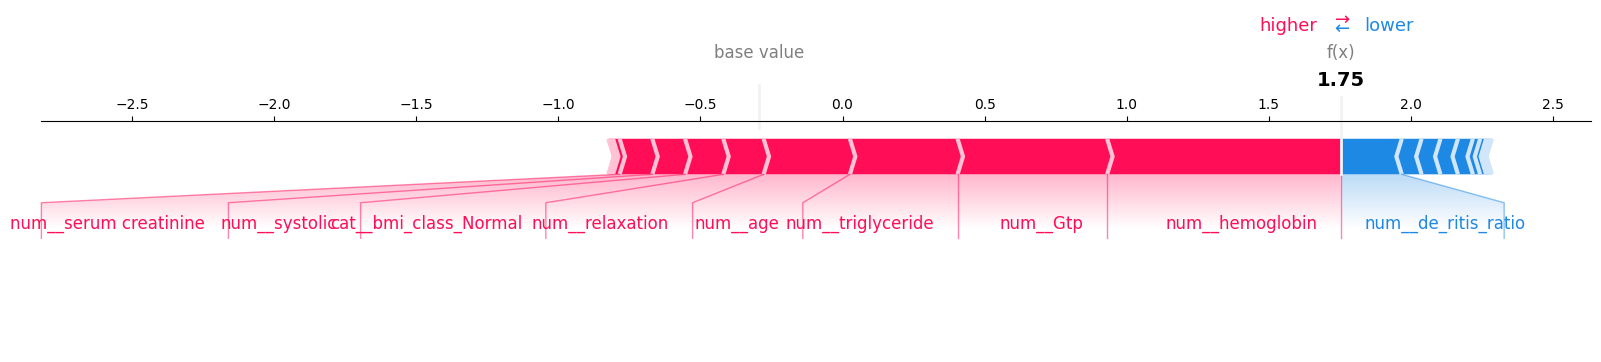

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[42], X_test_pipeline.named_steps['columntransformer'].get_feature_names_out(), matplotlib=True)

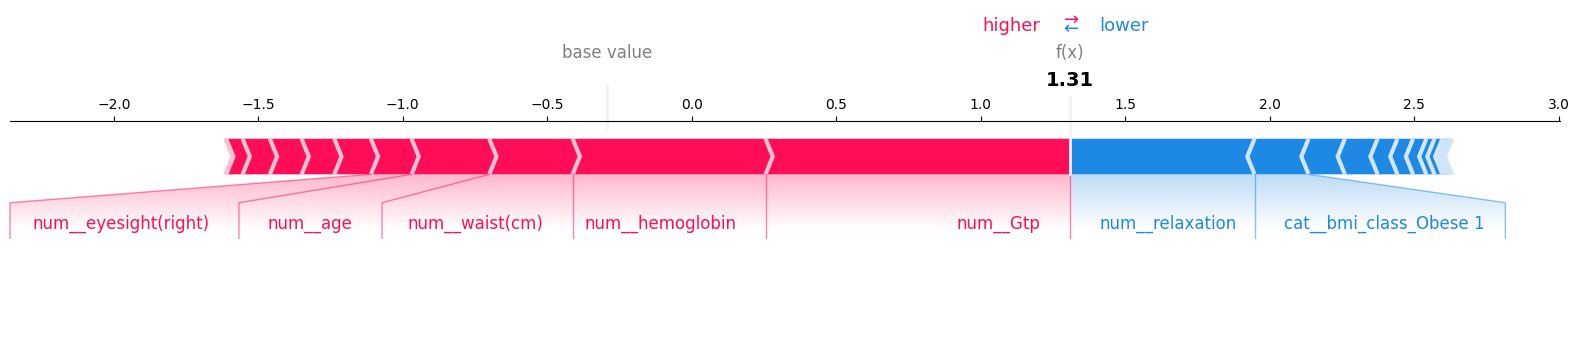

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[1403], X_test_pipeline.named_steps['columntransformer'].get_feature_names_out(), matplotlib=True)

In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

### Feature Importance

- High values of hemoglobin, gtp, triglyceride, serum creatinine contribute positively to the model
- Low values of age and LDL contribute positively, which makes sense since there are more smokers in the lower age brackets
- It's interesting the low LDL has positive effect in the model since it's supposed to be a good cholesterol

***Code Specifics***

We can generate summary plot using `summary_plot()` method. Below are list of important parameters of `summary_plot()` method.

```
Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.
​
features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand
​
plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
    or "compact_dot".
    What type of summary plot to produce. Note that "compact_dot" is only used for
    SHAP interaction values.
```
​

In [ ]:
shap_vals = shap_values[0]

feature_importance = pd.DataFrame(list(zip(model.named_steps['columntransformer'].get_feature_names_out(), shap_vals)),
                                  columns=['column_value', 'shap_vals'])

feature_importance.sort_values(by=['shap_vals'],
                               ascending=False,
                               inplace=True)

feature_importance

,column_value,shap_vals
0,num__age,1.309793
8,num__triglyceride,0.456603
26,cat__dental caries_0,0.201155
28,cat__bmi_class_Normal,0.169195
10,num__LDL,0.143213
15,num__de_ritis_ratio,0.109257
6,num__fasting blood sugar,0.052541
4,num__systolic,0.042837
14,num__cholesterol_ratio,0.016985
32,cat__bmi_class_Overweight,0.011165


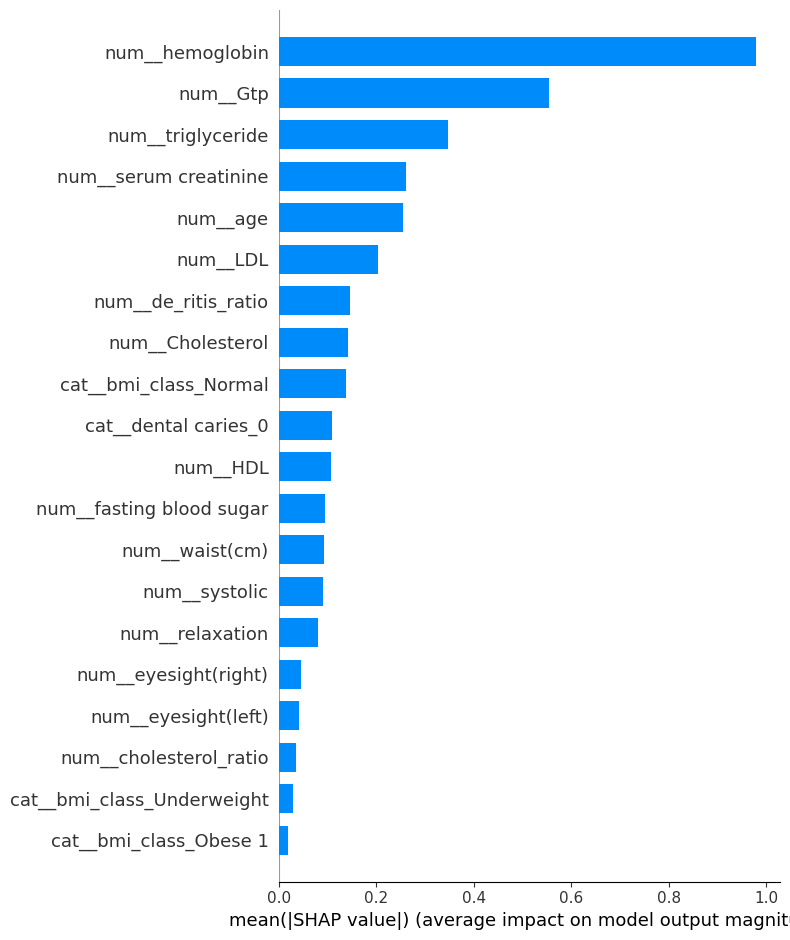

In [ ]:
shap.summary_plot(shap_values=shap_values,
                  features=model.named_steps['columntransformer'].get_feature_names_out(),
                  plot_type="bar")

### Beeswarm Plot

***Code Specifics***

We can generate summary plot using ``summary_plot()`` method. Below are list of important parameters of ``summary_plot()``.

```
Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand

plot_type : "dot" (default for single output), "bar" (default for multi-output), "violin",
    or "compact_dot".
    What type of summary plot to produce. Note that "compact_dot" is only used for
    SHAP interaction values.
```

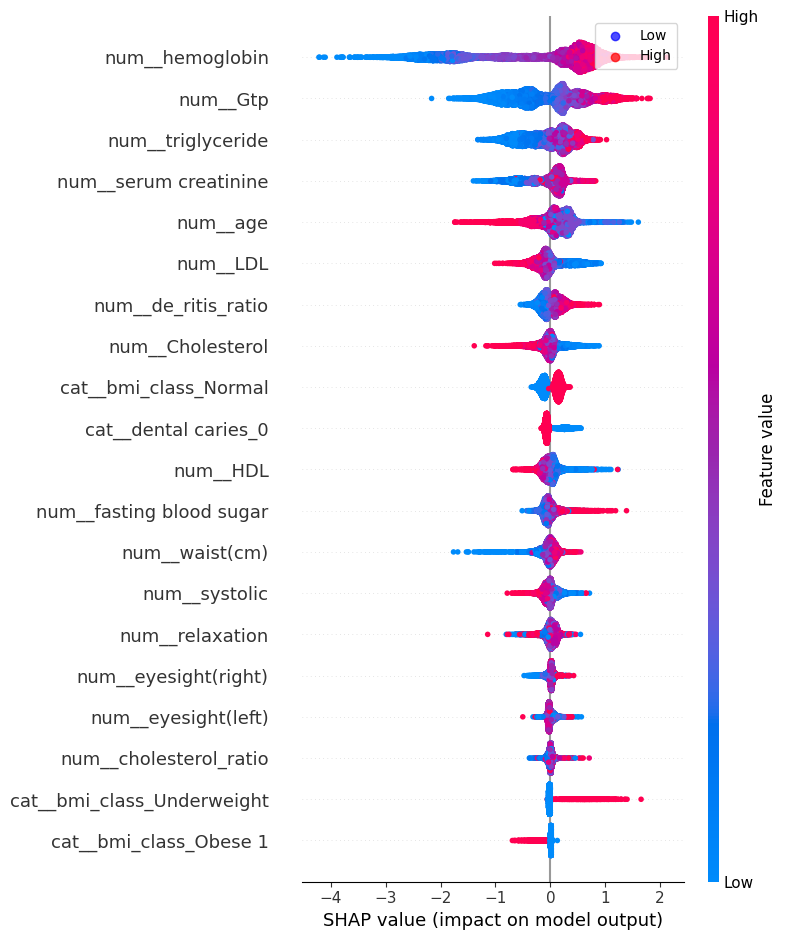

In [ ]:
# Create a summary plot
shap.summary_plot(shap_values, X_test_processed, plot_type="dot", show=False, feature_names=model.named_steps['columntransformer'].get_feature_names_out())

# Customize the colors for your plot
cmap = plt.get_cmap("coolwarm")
colors = cmap(shap_values / shap_values.max())

# Create a separate legend for the intensity
plt.scatter([], [], c="blue", label="Low", alpha=0.7)
plt.scatter([], [], c="red", label="High", alpha=0.7)
plt.legend(loc="upper right")

# Display the plot
plt.show()

## Waterfall Plot

In [ ]:
explainer = shap.TreeExplainer(model.named_steps['xgbclassifier'], feature_names=model.named_steps['columntransformer'].get_feature_names_out())
shap_values = explainer(X_test_processed)

[06:31:38] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


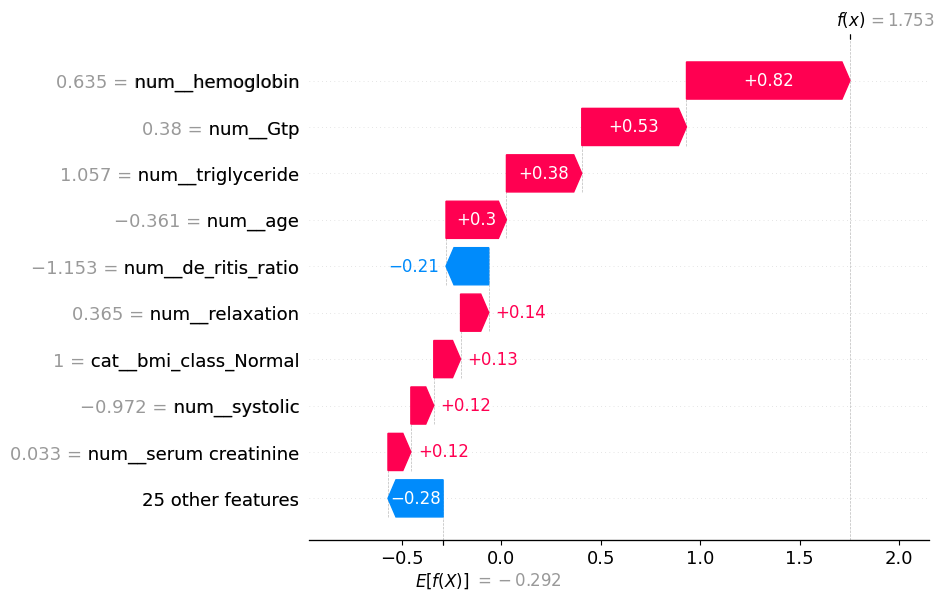

In [ ]:
shap.plots.waterfall(shap_values[42])